In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import os
import sys

# Add the parent directory to sys.path (to import util function)
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
    
#from set_transformer.main import read_ogt_data
from utils.utils import read_ogt_data

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = 50 

ogt_continuous_flag = True
X_train, X_train_column_names, y_train, X_test, X_test_column_names, y_test, categories_linspace = read_ogt_data(device, num_classes, ogt_continuous_flag)



## Read ancestral nodes

In [2]:
filename = "../data_ancestral/TableAncestralRoot1.tsv"
ancestr_table = pd.read_csv(filename,sep="\t")
column_names = ancestr_table.columns
#ancestr_table = ancestr_table.drop(columns=column_names[-1006:])
node_names = ancestr_table.columns
#ancestr_table = ancestr_table.T

ancestr_table['COG'] = ancestr_table['COG'].str.split('_').str[0]

ancestr_table_gr = ancestr_table.groupby('COG').sum()

#ancestr_table = ancestr_table.transpose()

#print(len(ancestr_table_gr['COG']))
ancestr_table_gr

print(len(ancestr_table_gr.index))
print(len(np.unique(ancestr_table_gr.index)))

2852
2852


In [3]:
filename = "../data_ancestral/ModalKEGGs.tsv"
kegg_cog_mapping = pd.read_csv(filename,sep="\t", header=None, names=["COG", "KEGG"])#, index_col=0)

print(len(kegg_cog_mapping['KEGG']))
print(len(np.unique(kegg_cog_mapping['KEGG'])))

kegg_cog_mapping

3507
3172


,COG,KEGG
0,COG1943,K07491
1,COG1670,K03790
2,COG0520,K11717
3,COG2461,K09155
4,COG1959,K13643
...,...,...
3502,COG4352,K02873
3503,COG1103,K06868
3504,COG5613,K15345
3505,COG4738,K21903


In [4]:
merged_df = pd.merge(kegg_cog_mapping, ancestr_table_gr, on='COG', how='inner')  # Change 'inner' to other types if needed
print(merged_df.columns)
print(len(merged_df['KEGG']))
print(len(np.unique(merged_df['KEGG'])))
merged_df

Index(['COG', 'KEGG', 'AABM5X1(0)', 'AABM5X2(1)', 'AABM5X3(2)', 'Abys1(3)',
       'Acid1(4)', 'Acid10(5)', 'Acid11(6)', 'Acid12(7)',
       ...
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012'],
      dtype='object', length=2015)
2852
2642


,COG,KEGG,AABM5X1(0),AABM5X2(1),AABM5X3(2),Abys1(3),Acid1(4),Acid10(5),Acid11(6),Acid12(7),...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,COG0520,K11717,1,1,1,0,2,1,2,1,...,0.50,0.62,0.22,0.67,0.16,0.33,0.15,0.24,0.18,0.00
1,COG2461,K09155,1,2,0,0,0,0,0,1,...,0.28,0.53,0.26,0.47,0.12,0.41,0.05,0.41,0.11,0.02
2,COG1959,K13643,1,1,0,3,0,1,3,1,...,2.35,0.74,1.21,0.70,0.82,0.87,0.33,0.66,0.21,0.01
3,COG0194,K00942,1,1,1,1,1,1,1,1,...,0.82,1.09,0.51,0.65,0.23,0.40,0.11,0.23,0.12,0.02
4,COG0452,K13038,1,1,1,1,1,1,1,1,...,2.10,1.34,1.62,1.24,1.08,0.64,0.30,0.49,0.22,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2847,COG5371,K01510,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2848,COG2965,K02686,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2849,COG3235,K02007,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2850,COG3085,K09897,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [5]:
ancestr_kegg = merged_df.drop(columns=['COG'])
ancestr_kegg = ancestr_kegg.groupby('KEGG', as_index=False).sum()

#ancestr_cog = ancestr_cog.transpose()
kegg_names = ancestr_kegg['KEGG']
print(kegg_names)
node_names = ancestr_kegg.columns[1:]
print(node_names)

ancestr_kegg = ancestr_kegg.drop(columns=['KEGG'])
count_table = ancestr_kegg.values
count_table_transp = count_table.T
count_table_transp
len(count_table_transp[0])

0       K00003
1       K00005
2       K00008
3       K00009
4       K00012
         ...  
2637    K23257
2638    K23258
2639    K23264
2640    K23265
2641    K23269
Name: KEGG, Length: 2642, dtype: object
Index(['AABM5X1(0)', 'AABM5X2(1)', 'AABM5X3(2)', 'Abys1(3)', 'Acid1(4)',
       'Acid10(5)', 'Acid11(6)', 'Acid12(7)', 'Acid13(8)', 'Acid14(9)',
       ...
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012'],
      dtype='object', length=2013)


2642

In [6]:
print(len(kegg_names))
print(len(np.unique(kegg_names)))
df_ancestr = pd.DataFrame(count_table_transp, columns=kegg_names)
df_ancestr

2642
2642


KEGG,K00003,K00005,K00008,K00009,K00012,K00013,K00014,K00020,K00024,K00027,...,K23181,K23187,K23205,K23242,K23256,K23257,K23258,K23264,K23265,K23269
0,0.00,0.0,3.00,0.00,1.00,0.00,0.0,0.00,1.00,1.00,...,0.00,0.0,0.0,1.00,0.00,1.00,0.00,1.00,1.00,1.00
1,0.00,0.0,1.00,0.00,1.00,0.00,0.0,0.00,1.00,1.00,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,1.00,1.00,1.00
2,0.00,0.0,0.00,0.00,1.00,0.00,0.0,0.00,1.00,1.00,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,1.00,1.00,1.00
3,1.00,0.0,6.00,0.00,1.00,1.00,0.0,0.00,1.00,1.00,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,1.00,0.00
4,1.00,0.0,8.00,0.00,2.00,1.00,0.0,1.00,1.00,0.00,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,1.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,0.13,0.0,1.19,0.03,0.45,1.18,0.0,0.02,0.05,0.35,...,0.01,0.0,0.0,0.02,0.03,0.01,0.01,0.57,0.33,1.20
2009,0.14,0.0,0.35,0.02,0.51,0.17,0.0,0.02,0.17,0.10,...,0.00,0.0,0.0,0.13,0.00,0.02,0.00,0.05,0.15,0.22
2010,0.09,0.0,0.88,0.02,0.11,0.36,0.0,0.00,0.02,0.30,...,0.03,0.0,0.0,0.07,0.02,0.00,0.00,0.31,0.24,0.99
2011,0.02,0.0,0.24,0.00,0.15,0.08,0.0,0.01,0.02,0.08,...,0.00,0.0,0.0,0.02,0.00,0.00,0.00,0.09,0.11,0.66


In [7]:
X_train_column_names

Index(['K07461', 'K00243', 'K00185', 'K01890', 'K00406', 'K03088', 'K07240',
       'K22391', 'K03657', 'K01809',
       ...
       'K00972', 'K11858', 'K11187', 'K10413', 'K05692', 'K21418', 'K12260',
       'K19949', 'K18134', 'K14326'],
      dtype='object', length=3165)

In [8]:
list1 = list(kegg_names)
list2 = list(X_train_column_names)

# Convert to sets and find intersection
keggs_intersection = list(set(list1) & set(list2))
len(keggs_intersection)

2635

In [9]:
X_train#, X_train_column_names
df_train = pd.DataFrame(X_train.numpy(), columns=X_train_column_names)
df_train = df_train[keggs_intersection]

#df_train = df[df.columns[df.columns.isin(keggs_intersection)]]
df_train

,K00865,K18330,K00548,K09938,K09940,K07176,K01654,K20950,K04074,K09915,...,K06215,K03299,K03795,K13626,K18331,K22579,K06001,K18588,K09880,K16371
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,...,0.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,2.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2997,1.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,5.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2999,2.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,2.0,2.0,1.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0


In [10]:
X_test#, X_train_column_names
df_test = pd.DataFrame(X_test.numpy(), columns=X_test_column_names)
df_test = df_test[keggs_intersection]

#df_train = df[df.columns[df.columns.isin(keggs_intersection)]]
df_test

,K00865,K18330,K00548,K09938,K09940,K07176,K01654,K20950,K04074,K09915,...,K06215,K03299,K03795,K13626,K18331,K22579,K06001,K18588,K09880,K16371
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
747,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
749,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [11]:
y_train.shape

torch.Size([3001])

In [12]:

df_ancestr = df_ancestr[keggs_intersection]
df_ancestr

KEGG,K00865,K18330,K00548,K09938,K09940,K07176,K01654,K20950,K04074,K09915,...,K06215,K03299,K03795,K13626,K18331,K22579,K06001,K18588,K09880,K16371
0,0.00,2.00,2.00,0.00,0.00,0.0,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.0,0.0,0.00
1,0.00,1.00,3.00,0.00,0.00,0.0,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.0,0.0,0.00
2,0.00,3.00,1.00,0.00,0.00,0.0,1.00,0.00,1.00,0.00,...,1.00,0.00,0.00,0.00,3.00,0.00,0.00,0.0,0.0,0.00
3,0.00,1.00,1.00,0.00,0.00,0.0,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,1.00,2.00,0.00,1.00,0.0,0.0,0.00
4,0.00,0.00,3.00,0.00,1.00,0.0,1.00,0.00,1.00,0.00,...,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,0.37,0.62,1.37,0.01,0.00,0.0,0.06,0.01,0.21,0.00,...,0.04,0.04,0.03,0.12,1.73,0.07,0.27,0.0,0.0,0.04
2009,0.03,0.21,0.27,0.00,0.02,0.0,0.40,0.09,0.01,0.02,...,0.00,0.01,0.00,0.71,0.73,0.02,0.04,0.0,0.0,0.00
2010,0.21,0.46,1.01,0.00,0.05,0.0,0.04,0.01,0.09,0.02,...,0.03,0.02,0.03,0.09,1.09,0.07,0.11,0.0,0.0,0.05
2011,0.11,0.08,0.71,0.00,0.02,0.0,0.04,0.00,0.01,0.00,...,0.02,0.00,0.01,0.05,0.36,0.10,0.01,0.0,0.0,0.00


In [13]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score

def train_xgboost(X_tr, y_tr):
    model = XGBRegressor(
        n_jobs=-1,                # Use all CPU cores
        tree_method="hist",   # Use "hist" for CPU, "gpu_hist" for GPU
        objective="reg:squarederror",  # Default loss function for regression
        )
    model.fit(X_tr,y_tr);
    return model



### Case 1: Train on the full signal data

rmse = 6.673580169677734; r2 = 0.7939144968986511


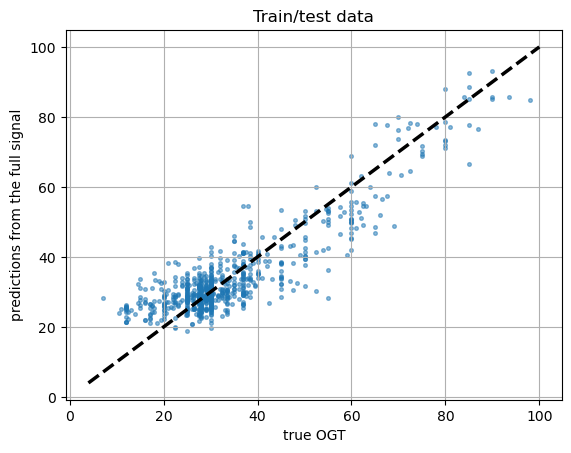

In [14]:
X_train = df_train.values
model_full_signal = train_xgboost(X_train, y_train)

predictions_full_signal_test = model_full_signal.predict(df_test.values)
rmse = np.sqrt(mean_squared_error(y_test, predictions_full_signal_test))
r2 = r2_score(y_test, predictions_full_signal_test)

print(f"rmse = {rmse}; r2 = {r2}")

plt.scatter(y_test, predictions_full_signal_test, marker='o', alpha = 0.5, c = "tab:blue", s=7)
plt.plot([4,100],[4,100], c = "black", label = "x=y", linestyle='--', linewidth=2.5) 
plt.xlabel('true OGT')
plt.ylabel('predictions from the full signal')
plt.title("Train/test data")
plt.grid(True)

In [17]:
predictions_full_signal_ancestr = model_full_signal.predict(df_ancestr.values)

### Case 2: Train on the precence only signal data

rmse = 7.050564765930176; r2 = 0.7699736952781677


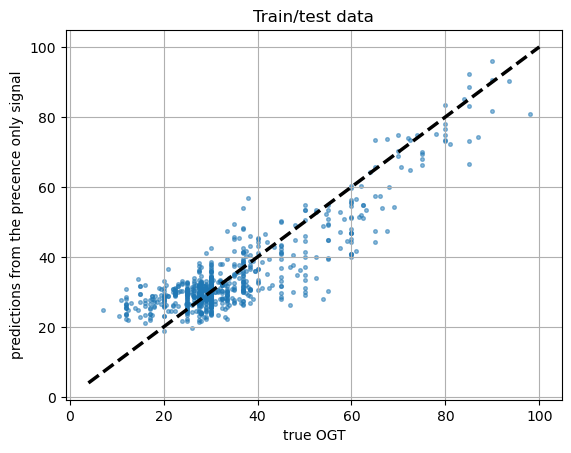

In [18]:
X_train = (df_train.values > 0).astype(int)
model_precence_only_signal = train_xgboost(X_train, y_train)

X_test = (df_test.values > 0).astype(int)
predictions_precence_only_signal_test = model_precence_only_signal.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, predictions_precence_only_signal_test))
r2 = r2_score(y_test, predictions_precence_only_signal_test)

print(f"rmse = {rmse}; r2 = {r2}")

plt.scatter(y_test, predictions_precence_only_signal_test, marker='o', alpha = 0.5, c = "tab:blue", s=7)
plt.plot([4,100],[4,100], c = "black", label = "x=y", linestyle='--', linewidth=2.5) 
plt.xlabel('true OGT')
plt.ylabel('predictions from the precence only signal')
plt.title("Train/test data")
plt.grid(True)

In [19]:
X_precence_only_ancestr = (df_ancestr.values > 0).astype(int) 
predictions_precence_only_ancestr = model_precence_only_signal.predict(X_precence_only_ancestr)

### Comparison

rmse = 3.978178024291992; r2 = 0.8978347778320312


Text(0.5, 1.0, 'Train/test data | RMSE = 3.98; R² = 0.90')

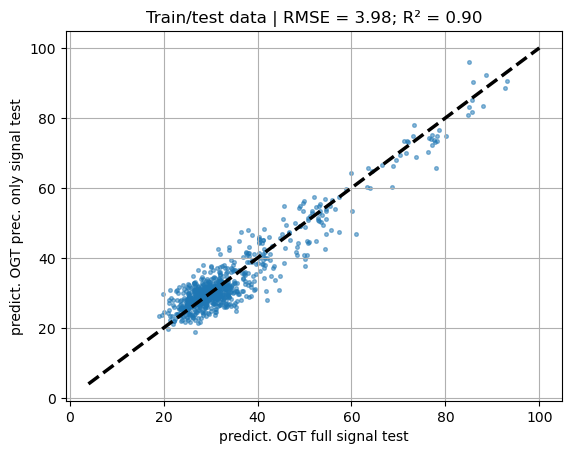

In [20]:
plt.scatter(predictions_full_signal_test, predictions_precence_only_signal_test, alpha = 0.5, c = "tab:blue", s=7)
plt.plot([4,100],[4,100], c = "black", label = "x=y", linestyle='--', linewidth=2.5) 
plt.xlabel('predict. OGT full signal test')
plt.ylabel('predict. OGT prec. only signal test')

plt.grid(True)

rmse = np.sqrt(mean_squared_error(predictions_full_signal_test, predictions_precence_only_signal_test))
r2 = r2_score(predictions_full_signal_test, predictions_precence_only_signal_test)

print(f"rmse = {rmse}; r2 = {r2}")

plt.title(f"Train/test data | RMSE = {rmse:.2f}; R² = {r2:.2f}")

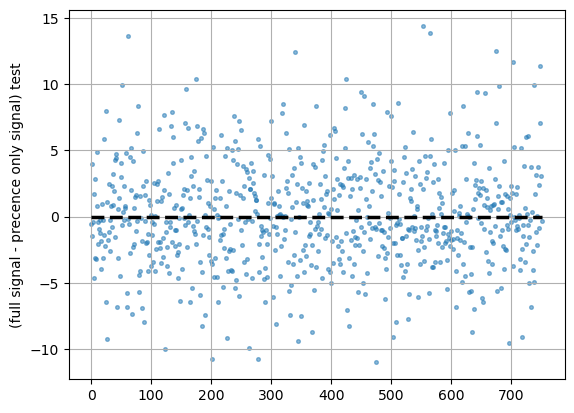

In [21]:
diff = [predictions_full_signal_test[i] - predictions_precence_only_signal_test[i] for i in range(len(predictions_full_signal_test))]
plt.scatter(range(len(diff)), diff, alpha = 0.5, c = "tab:blue", s=7)
plt.plot([0,len(diff)],[0,0], c = "black", label = "x=y", linestyle='--', linewidth=2.5) 
plt.ylabel('(full signal - precence only signal) test')
plt.grid(True)

rmse = 10.791933059692383; r2 = -0.13438069820404053


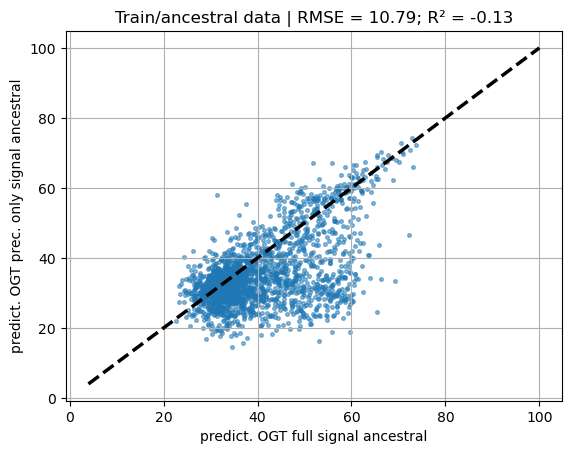

In [22]:
plt.scatter(predictions_full_signal_ancestr, predictions_precence_only_ancestr, alpha = 0.5, c = "tab:blue", s=7)
plt.plot([4,100],[4,100], c = "black", label = "x=y", linestyle='--', linewidth=2.5) 
plt.xlabel('predict. OGT full signal ancestral')
plt.ylabel('predict. OGT prec. only signal ancestral')


rmse = np.sqrt(mean_squared_error(predictions_full_signal_ancestr, predictions_precence_only_ancestr))
r2 = r2_score(predictions_full_signal_ancestr, predictions_precence_only_ancestr)

print(f"rmse = {rmse}; r2 = {r2}")

plt.title(f"Train/ancestral data | RMSE = {rmse:.2f}; R² = {r2:.2f}")
plt.grid(True)

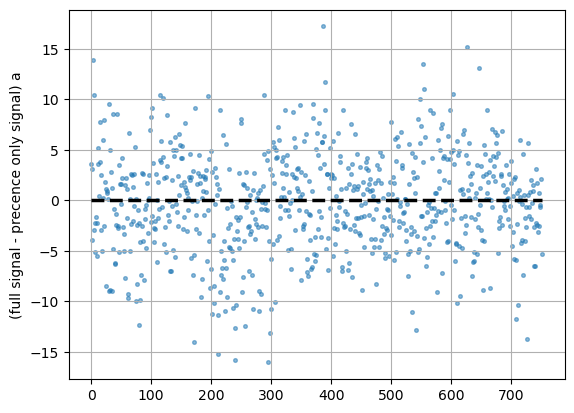

In [23]:
diff = [predictions_full_signal_ancestr[i] - predictions_precence_only_ancestr[i] for i in range(len(predictions_full_signal_test))]
plt.scatter(range(len(diff)), diff, alpha = 0.5, c = "tab:blue", s=7)
plt.plot([0,len(diff)],[0,0], c = "black", label = "x=y", linestyle='--', linewidth=2.5) 
plt.ylabel('(full signal - precence only signal) a')
plt.grid(True)

In [24]:
# SAVE RESULTS

data_n = [list(node_names), list(predictions_full_signal_ancestr), list(predictions_precence_only_ancestr)]

data = {'node_name': node_names, 'ogt_full_signal': predictions_full_signal_ancestr, 'ogt_presence_only_signal': predictions_precence_only_ancestr}

# Create a DataFrame
df = pd.DataFrame(data)

#df = pd.DataFrame(data_n, columns=["node_name", "ogt_full_signal", "ogt_presence_only_signal"])

# Save the DataFrame as a CSV file
df.to_csv("ogt_ancestral_nodes.csv", index=False)

print(df)


       node_name  ogt_full_signal  ogt_presence_only_signal
0     AABM5X1(0)        43.971775                 40.382160
1     AABM5X2(1)        52.290421                 56.253685
2     AABM5X3(2)        62.213223                 59.092213
3       Abys1(3)        38.657158                 24.809128
4       Acid1(4)        30.587358                 33.516438
...          ...              ...                       ...
2008        2008        35.696522                 31.294424
2009        2009        33.420742                 39.219475
2010        2010        35.861824                 29.281752
2011        2011        33.420742                 41.556503
2012        2012        33.420742                 47.511669

[2013 rows x 3 columns]
